In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
train_df = pd.read_csv("./knn-traindata.csv")
test_df = pd.read_csv("./knn-testdata.csv")

In [3]:
print(train_df.shape)
print(test_df.shape)

(52, 3)
(14, 3)


In [4]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             52 non-null     int64
 1   PurchaseAmount  52 non-null     int64
 2   Approval        52 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB
None


In [5]:
train_df.head()

,Age,PurchaseAmount,Approval
0,44,204,0
1,35,183,1
2,41,221,0
3,40,158,1
4,40,280,0


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             14 non-null     int64
 1   PurchaseAmount  14 non-null     int64
 2   Approval        14 non-null     int64
dtypes: int64(3)
memory usage: 468.0 bytes


In [7]:
test_df.head()

,Age,PurchaseAmount,Approval
0,37,523,0
1,41,621,0
2,32,686,1
3,33,690,1
4,28,263,1


In [8]:
X_train = train_df.drop(columns="Approval")
y_train = train_df[["Approval"]]

X_test = test_df.drop(columns="Approval")
y_test = test_df[["Approval"]]

In [9]:
knn_2_model = KNeighborsClassifier(n_neighbors= 2)
knn_2_model.fit(X=X_train, y= y_train.values.ravel())

KNeighborsClassifier(n_neighbors=2)

In [10]:
y_predicted = knn_2_model.predict(X_test)

In [11]:
output_confusion_matrix = confusion_matrix(y_true= y_test, y_pred= y_predicted)
print(f"Confusion matrix of test data given below: \n{output_confusion_matrix}")

output_accuracy_score = accuracy_score(y_true= y_test, y_pred= y_predicted)
print(f"Accuracy Score of the test data: {output_accuracy_score}")

output_classification_report = classification_report(y_true= y_test, y_pred= y_predicted)
print(f"Classification Report of the test dataset is given below: \n{output_classification_report}")

Confusion matrix of test data given below: 
[[5 0]
 [8 1]]
Accuracy Score of the test data: 0.42857142857142855
Classification Report of the test dataset is given below: 
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.11      0.20         9

    accuracy                           0.43        14
   macro avg       0.69      0.56      0.38        14
weighted avg       0.78      0.43      0.33        14



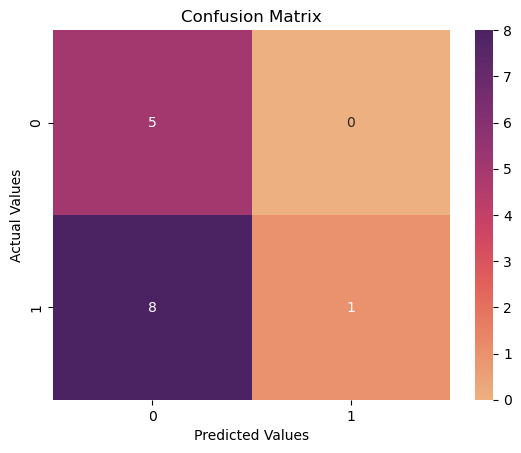

In [12]:
sns.heatmap(data= output_confusion_matrix, annot= True, cmap= "flare")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

In [13]:
param_grid = {'n_neighbors': range(1, 10)} # Define the range of K values to try

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy') # Use 5-fold cross-validation
grid_search.fit(X_train, y_train.values.ravel())

print(grid_search.best_params_)

{'n_neighbors': 3}


In [14]:
errorList = []
for i in range(2, 10):
    knn_model = KNeighborsClassifier(n_neighbors= i)
    knn_model.fit(X=X_train, y= y_train.values.ravel())
    y_predicted = knn_model.predict(X_test)
    errorList.append(1- accuracy_score(y_true= y_test, y_pred= y_predicted))



In [15]:
errorList

[0.5714285714285714,
 0.5,
 0.5,
 0.5,
 0.6428571428571428,
 0.6428571428571428,
 0.6428571428571428,
 0.6428571428571428]

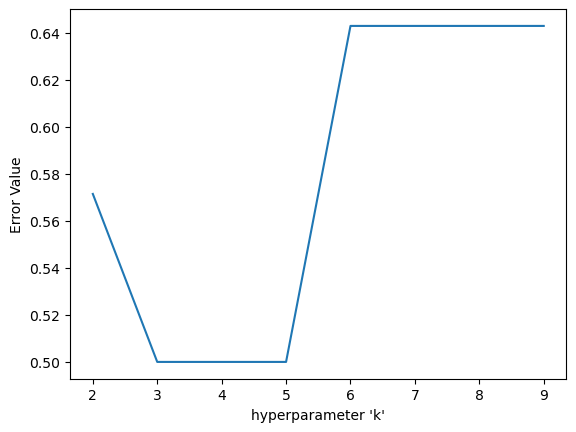

In [16]:
import numpy as np
sns.lineplot(x= np.array(range(2, 10)), y = errorList)
plt.ylabel("Error Value")
plt.xlabel("hyperparameter 'k'")
plt.show()

In [18]:
optimal_knn_model = KNeighborsClassifier(n_neighbors= 3)
optimal_knn_model.fit(X=X_train, y= y_train.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_predicted_optimal = optimal_knn_model.predict(X_test)

In [20]:
output_optimal_confusion_matrix = confusion_matrix(y_true= y_test, y_pred= y_predicted_optimal)
print(f"Confusion matrix of test data given below: \n{output_optimal_confusion_matrix}")

output_optimal_accuracy_score = accuracy_score(y_true= y_test, y_pred= y_predicted_optimal)
print(f"Accuracy Score of the test data: {output_optimal_accuracy_score}")

output_optimal_classification_report = classification_report(y_true= y_test, y_pred= y_predicted_optimal)
print(f"Classification Report of the test dataset is given below: \n{output_optimal_classification_report}")

Confusion matrix of test data given below: 
[[4 1]
 [6 3]]
Accuracy Score of the test data: 0.5
Classification Report of the test dataset is given below: 
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.75      0.33      0.46         9

    accuracy                           0.50        14
   macro avg       0.57      0.57      0.50        14
weighted avg       0.62      0.50      0.49        14



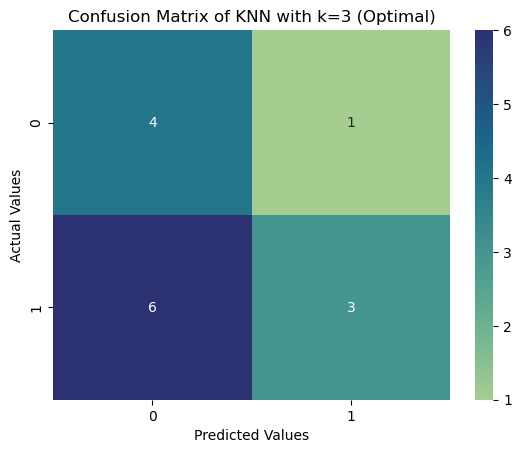

In [21]:
sns.heatmap(data= output_optimal_confusion_matrix, annot= True, cmap= "crest")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix of KNN with k=3 (Optimal)")
plt.show()

In [22]:
optimal_knn_model5 = KNeighborsClassifier(n_neighbors= 5)
optimal_knn_model5.fit(X=X_train, y= y_train.values.ravel())
y_predicted_optimal5 = optimal_knn_model.predict(X_test)

confusion_matrix5 = confusion_matrix(y_true= y_test, y_pred= y_predicted_optimal5)
print(f"Confusion matrix of test data given below: \n{confusion_matrix5}")

accuracy_score5 = accuracy_score(y_true= y_test, y_pred= y_predicted_optimal5)
print(f"Accuracy Score of the test data: {accuracy_score5}")

classification_report5 = classification_report(y_true= y_test, y_pred= y_predicted_optimal5)
print(f"Classification Report of the test dataset is given below: \n{classification_report5}")

Confusion matrix of test data given below: 
[[4 1]
 [6 3]]
Accuracy Score of the test data: 0.5
Classification Report of the test dataset is given below: 
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.75      0.33      0.46         9

    accuracy                           0.50        14
   macro avg       0.57      0.57      0.50        14
weighted avg       0.62      0.50      0.49        14



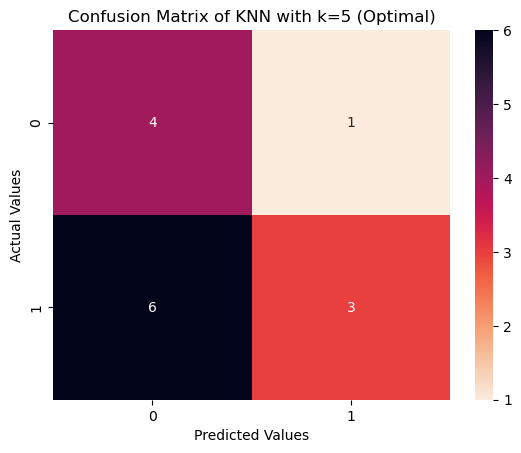

In [23]:
sns.heatmap(data= confusion_matrix5, annot= True, cmap= "rocket_r")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix of KNN with k=5 (Optimal)")
plt.show()

k = 3, 4, 5 are the optimal k values. We normally do not select even k value so. When we build the KNN model using K = 3, or K = 5 then it will have same output. It is varified from above confusion matrices and accuracy score. 